# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import calendar
%matplotlib inline


pd.options.display.max_columns = 50

In [2]:
data = pd.read_csv('../data/cleaned_investments_VC.csv', index_col=[0])

# Visualizations

## Class Imbalance

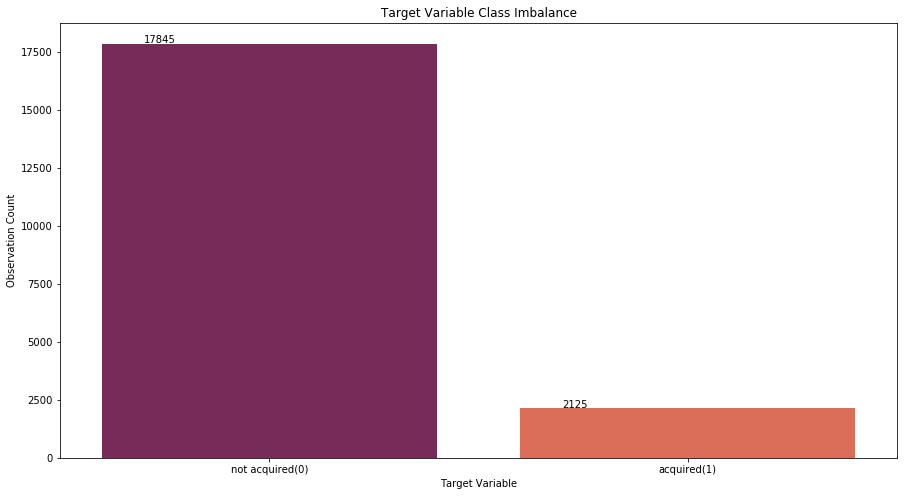

In [3]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot('target', data=data, palette='rocket')
sns.color_palette("rocket")
ax.set(xlabel='Target Variable', ylabel='Observation Count', title='Target Variable Class Imbalance', xticklabels=['not acquired(0)','acquired(1)'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Category List

In [4]:
%store -r category_dummies

In [5]:
category_dummies = category_dummies.drop(columns=['and','+'])
column_names = list(category_dummies.columns)
# category_dummies.columns.to_list()

In [6]:
category_frequency_dict = []

for name in column_names:
    
    entry = {'frequency': category_dummies[name].sum(), 'category': name}
    category_frequency_dict.append(entry)

In [7]:
sorted_dict = sorted(category_frequency_dict, key = lambda i: i['frequency'],reverse=True)

In [8]:
graphing_dict = sorted_dict[:25]

In [9]:
graphing_dict

[{'frequency': 6258, 'category': 'software'},
 {'frequency': 2744, 'category': 'mobile'},
 {'frequency': 2309, 'category': 'web'},
 {'frequency': 2174, 'category': 'biotechnology'},
 {'frequency': 2173, 'category': 'media'},
 {'frequency': 2115, 'category': 'social'},
 {'frequency': 1865, 'category': 'health'},
 {'frequency': 1500, 'category': 'curated'},
 {'frequency': 1476, 'category': 'enterprise'},
 {'frequency': 1327, 'category': 'e-commerce'},
 {'frequency': 1322, 'category': 'technology'},
 {'frequency': 1307, 'category': 'advertising'},
 {'frequency': 1150, 'category': 'games'},
 {'frequency': 1118, 'category': 'analytics'},
 {'frequency': 1039, 'category': 'marketing'},
 {'frequency': 948, 'category': 'care'},
 {'frequency': 906, 'category': 'finance'},
 {'frequency': 897, 'category': 'hardware'},
 {'frequency': 811, 'category': 'wellness'},
 {'frequency': 771, 'category': 'internet'},
 {'frequency': 769, 'category': 'services'},
 {'frequency': 757, 'category': 'video'},
 {'fr

In [10]:
X_categories = []
y_frequencies = []
for num in range(0,25):
    values = list(graphing_dict[num].values())
    X_categories.append(values[1])
    y_frequencies.append(values[0])

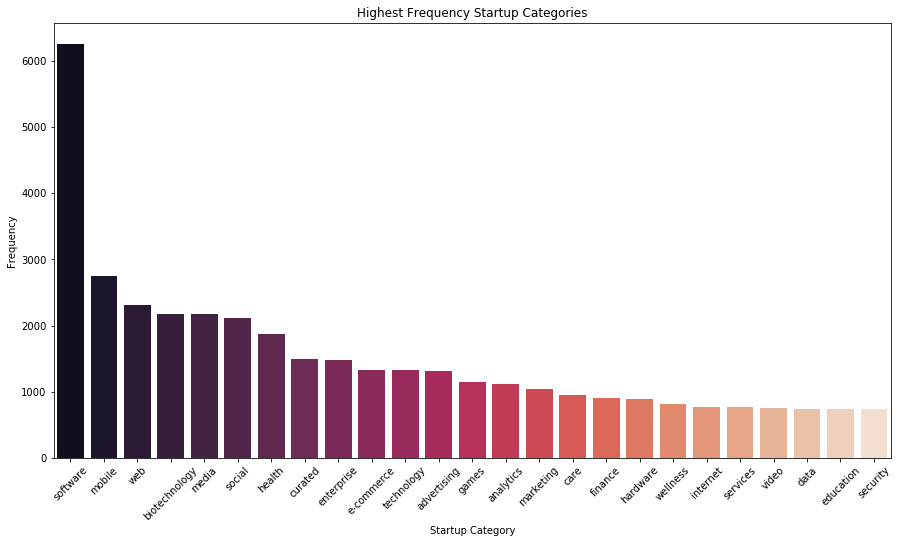

In [11]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(X_categories, y_frequencies, palette='rocket')
ax.set(xlabel='Startup Category', ylabel='Frequency', title='Highest Frequency Startup Categories')
plt.xticks(rotation=45)
plt.show()

# Funding Sources for companies that were acquired.

In [14]:
acquired = data.loc[data['target'] == 1]

In [93]:
fund_types = ['seed', 'venture', 'other', 'debt_financing', 'angel', 'private_equity', 'round_A','round_B']


seed_total = acquired.seed.sum()
venture_total = acquired.venture.sum()
equity_total = acquired.equity_crowdfunding.sum()
undis = acquired.undisclosed.sum()
convertable = acquired.convertible_note.sum()
debt_financing = acquired.debt_financing.sum()
angel = acquired.angel.sum()
grant = acquired.grant.sum()
pe = acquired.private_equity.sum()
round_a = acquired.round_A.sum()
round_b = acquired.round_B.sum()

size = [seed_total, venture_total, convertable+equity_total+grant+undis, debt_financing, angel, pe, round_a, round_b]

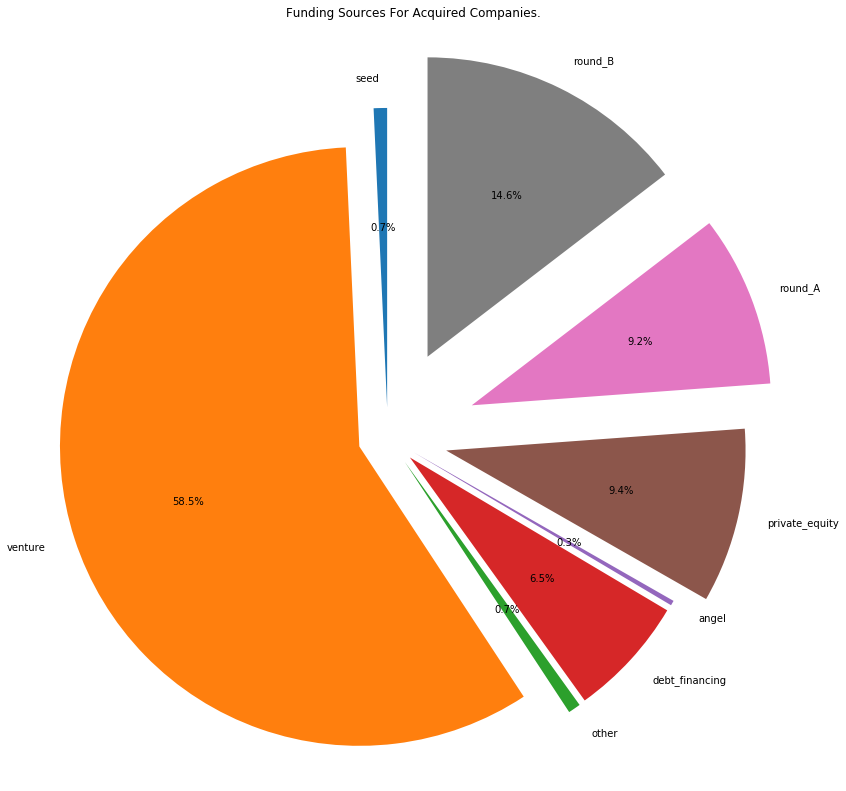

In [116]:

explode = (.1, .1, .1,.1,.1,.2,.3,.3) 

fig1, ax1 = plt.subplots(figsize=(14,14))
ax1.pie(size, labels=fund_types, autopct='%1.1f%%',
        shadow=False, startangle=90, explode=explode)
ax1.axis('equal') 
plt.title('Funding Sources For Acquired Companies.', fontsize=12)
plt.show()